In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
data= read_csv("baseball-9192.csv")
y = data["Salary"]

In [72]:
from sklearn.linear_model import LinearRegression
cv_MSE = []
cv_r2 = []
best_variable, best_r2 = 0,0
for i in range(2,13):
    lm = LinearRegression()
    data_x = data.iloc[:,i:i+1]
    avg_r2 = np.mean(cross_val_score(lm,data_x, y, cv=10,scoring='r2'))
    avg_MSE =  np.mean(cross_val_score(lm,data_x, y, cv=10,scoring='neg_mean_squared_error'))
    cv_r2.append(avg_r2)
    cv_MSE.append(avg_MSE)
    if avg_r2 > best_r2:
        best_r2=avg_r2
        best_variable=i   

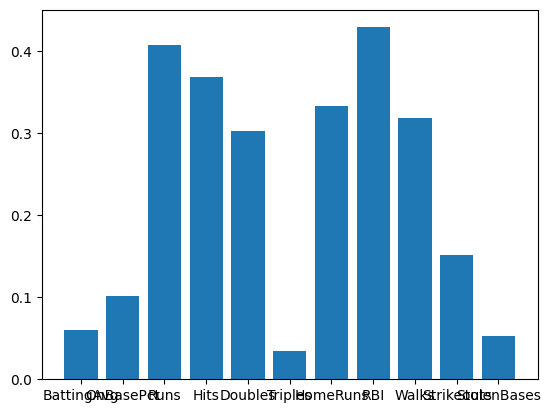

In [35]:
import matplotlib.pyplot as plt

plt.bar(range(len(cv_score)), cv_score, tick_label=labels[2:13])
plt.show()

In [73]:
dataframe = DataFrame({'variable':labels[2:13],'R2':cv_r2,'MSE':list(map(abs,cv_MSE))})
dataframe.to_csv("test.csv",index=False,sep=',')


In [ ]:
X = data_train[:,2:13]
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [87]:
import itertools as it
from sklearn.preprocessing import StandardScaler
labels =data.columns.values.tolist()
x_labels =labels[2:13] 
cb = it.combinations(x_labels, 2)
lm = LinearRegression()
cv_MSE = []
cv_r2 = []
variable_list = []
best = 100000000000000000000
sc = StandardScaler()
data_x = sc.fit_transform(data[x_labels])
data_x=DataFrame(data=data_x,columns=x_labels)
for i in range(1,len(x_labels)):
    combine = it.combinations(x_labels, i)
    for combination in combine:
        test_data = data_x[list(combination)]
        variable_list.append(list(combination))
        avg_r2 = np.mean(cross_val_score(lm,test_data, y,n_jobs=-1 ,cv=5,scoring='r2'))
        avg_MSE =  abs(np.mean(cross_val_score(lm,test_data, y,n_jobs=-1, cv=5,scoring='neg_mean_squared_error')))
        cv_r2.append(avg_r2)
        cv_MSE.append(avg_MSE)
        if avg_MSE < best:
            best=avg_MSE
            best_variable= combination

In [70]:
dataframe = DataFrame({'combination':variable_list,'R2':cv_r2,'MSE':cv_MSE})
dataframe.to_csv("problem3.csv",index=False,sep=',')

In [60]:
combine = it.combinations(x_labels, 1)
for i in combine:
    print(list(i))

['BattingAvg']
['OnBasePct']
['Runs']
['Hits']
['Doubles']
['Triples']
['HomeRuns']
['RBI']
['Walks']
['Strikeouts']
['StolenBases']
